In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


In [13]:
# employee_salary_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Step 1: Load Dataset
df = pd.read_csv('salary_data.csv')  # Replace with actual CSV file

# Step 2: Preprocess Data
# Display first few rows
print(df.head())

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing values (or use imputation)
df.dropna(inplace=True)




   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Missing values:
 YearsExperience    0
Salary             0
dtype: int64


In [19]:
# Step 3: Define Features and Target
X = df.drop('Salary', axis=1)
y = df['Salary']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Prediction
y_pred = model.predict(X_test)

# Step 8: Save Model
joblib.dump(model, 'employee_salary_model.pkl')
print("Model saved as employee_salary_model.pkl")



Model saved as employee_salary_model.pkl


In [21]:
# Step 7: Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 6872.007670634925
Root Mean Squared Error: 7982.551579097405
R² Score: 0.8752513004196268


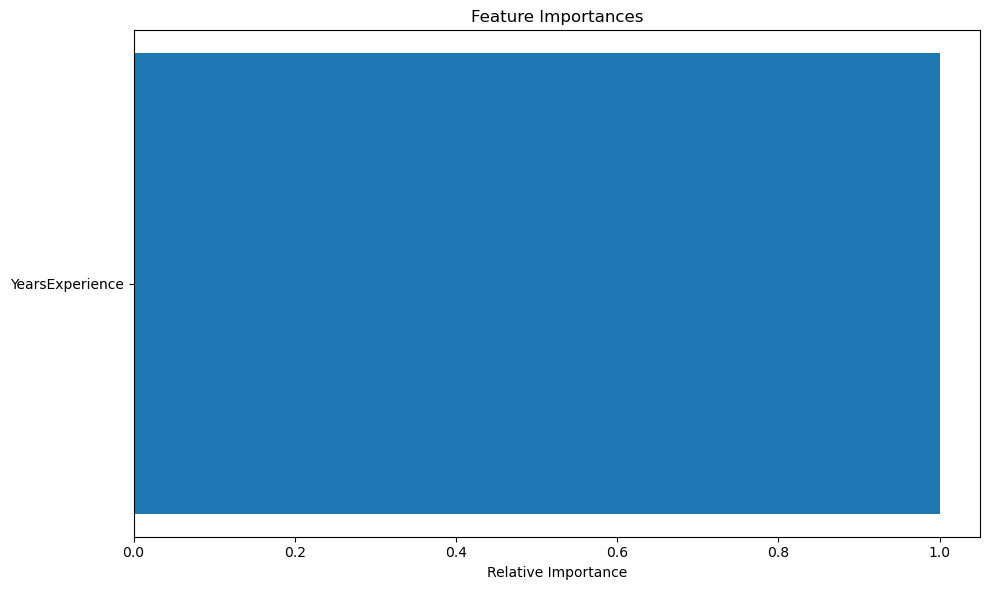

In [23]:
# Optional: Visualize Feature Importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [25]:
# predict_salary.py

import joblib
import pandas as pd

# Load saved model
model = joblib.load('employee_salary_model.pkl')

# Example new input data (match columns used in training)
new_data = pd.DataFrame({
    'YearsExperience': [5]
})

predicted_salary = model.predict(new_data)
print(f"Predicted Salary: ₹{predicted_salary[0]:,.2f}")


Predicted Salary: ₹64,588.08
